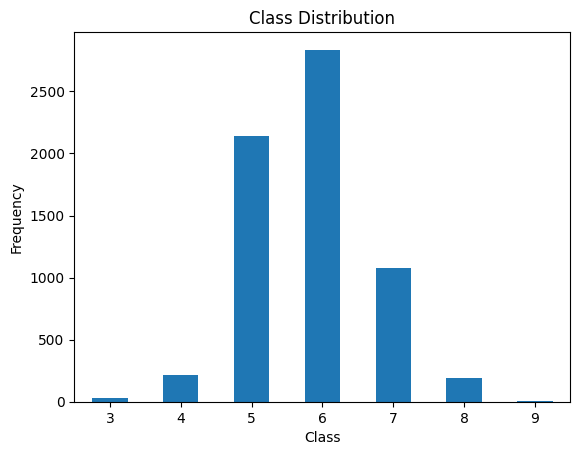

In [1]:
# Initiate
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

# Fetch dataset (red wine)
wine_quality = fetch_ucirepo(id=186)

# Create pandas dataframes of the data.
X = wine_quality.data.features
y = wine_quality.data.targets
data = pd.concat([X, y], axis = 1)

# STEP 1

# Display the first few rows of the dataset
# print(data.head())

# Plot class distribution
data['quality'].value_counts(sort = False).sort_index().plot(kind = 'bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.show()


In [2]:
# STEP 2

from sklearn.model_selection import train_test_split

# Define the feature matrix X and the target vector y
X = data.drop('quality', axis=1)
y = data['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [3]:
# STEP 3

from sklearn.preprocessing import StandardScaler

# Perform scaling on the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# STEP 4

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# Initialize the logistic regression model
model_imbalanced = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000)

# Define the cross-validation strategy
rkf = RepeatedStratifiedKFold(n_splits=3, n_repeats=10, random_state=42)

imbalanced_score = cross_val_score(model_imbalanced, X_train_scaled, y_train, cv=rkf, scoring='accuracy')

# results
print(f"Cross Validation Accuracy (Imbalanced): {imbalanced_score.mean():.3f} (+/- {imbalanced_score.std():.3f})")

Cross Validation Accuracy (Imbalanced): 0.544 (+/- 0.008)



Evaluation on Imbalanced Dataset:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       1.00      0.02      0.05        43
           5       0.58      0.54      0.56       428
           6       0.51      0.71      0.60       567
           7       0.52      0.28      0.37       216
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1300
   macro avg       0.37      0.22      0.22      1300
weighted avg       0.53      0.53      0.51      1300

Accuracy: 0.5346
Confusion Matrix:


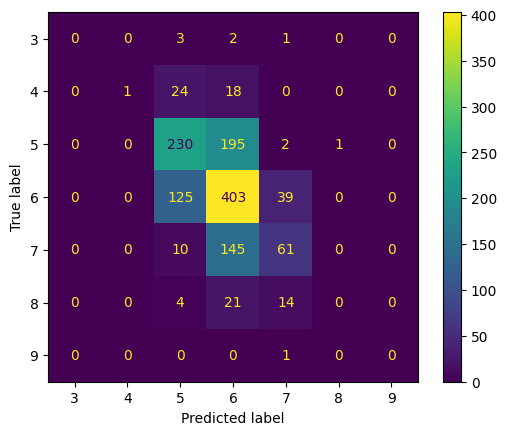

In [5]:
# Step 6

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Evaluate model on test set
model_imbalanced.fit(X_train_scaled, y_train)
imbalanced_pred = model_imbalanced.predict(X_test_scaled)

print("\nEvaluation on Imbalanced Dataset:")
print(classification_report(y_test, imbalanced_pred, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, imbalanced_pred):.4f}")
print("Confusion Matrix:")

# Generate the confusion matrix
cm = confusion_matrix(y_test, imbalanced_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_imbalanced.classes_)
disp.plot()

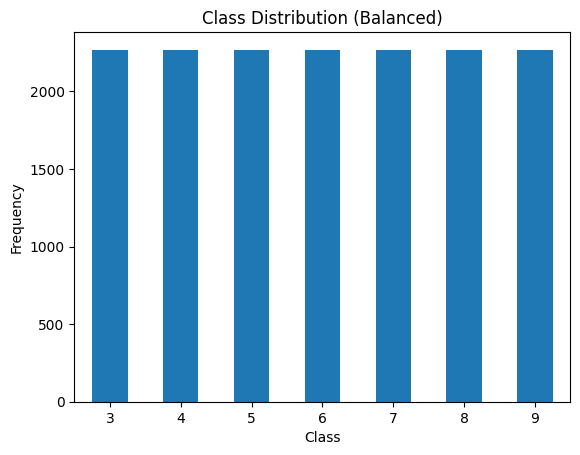

\nEvaluation on Balanced Dataset:
              precision    recall  f1-score   support

           3       0.02      0.50      0.04         6
           4       0.10      0.49      0.17        43
           5       0.57      0.36      0.44       428
           6       0.56      0.26      0.36       567
           7       0.31      0.26      0.29       216
           8       0.08      0.46      0.13        39
           9       0.00      0.00      0.00         1

    accuracy                           0.31      1300
   macro avg       0.23      0.33      0.20      1300
weighted avg       0.49      0.31      0.36      1300

Accuracy: 0.3077
Confusion Matrix:
Cross-Validation Accuracy (Balanced): 0.501 (+/- 0.007)


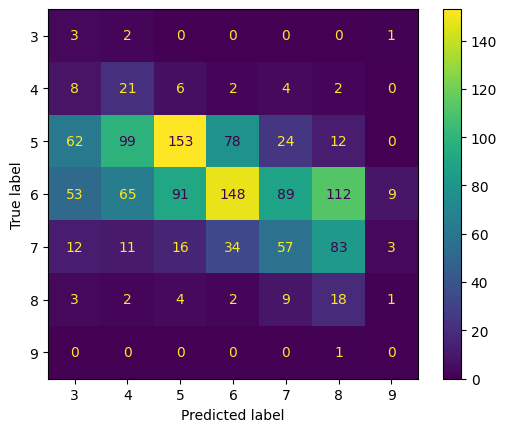

In [6]:
from imblearn.over_sampling import SMOTE
import numpy as np

# STEP 7-9

# balance the train set
y_train = np.ravel(y_train) # make sure y_train is 1-dimensional
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# plot balanced distribution
pd.Series(y_train_balanced).value_counts(sort=False).sort_index().plot(kind='bar')
plt.title("Class Distribution (Balanced)")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

# train decition tree on balanced data
model_balanced = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000)
model_balanced.fit(X_train_balanced, y_train_balanced)

# evaluate test set
balanced_pred = model_balanced.predict(X_test_scaled)
print("\\nEvaluation on Balanced Dataset:")
print(classification_report(y_test, balanced_pred, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, balanced_pred):.4f}")
print("Confusion Matrix:")

# Generate the confusion matrix
cm = confusion_matrix(y_test, balanced_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_balanced.classes_)
disp.plot()

# cv on balanced data
cv_scores_balanced = cross_val_score(model_balanced, X_train_balanced, y_train_balanced, cv=rkf, scoring='accuracy')
print(f"Cross-Validation Accuracy (Balanced): {cv_scores_balanced.mean():.3f} (+/- {cv_scores_balanced.std():.3f})")
